In [4]:
# data manipulation
import numpy as np
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import metrics

In [5]:
# sets matplotlib to inline
%matplotlib inline  

# importing LogisticRegression for Test and Train
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("class A.csv")

In [7]:
df.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.14,0,0.43,2,238,3,0,0,hr,low
1,0.10,1,0.55,2,247,4,0,0,sales,medium
2,0.10,1,0.55,2,247,4,0,0,sales,medium
3,0.10,1,0.55,2,247,4,0,0,sales,medium
4,0.21,0,0.43,2,249,3,0,0,marketing,low


In [14]:
df.shape

(3000, 10)

In [15]:
df.columns

Index(['satisfaction_level', 'left', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
len(object_col)

NameError: name 'object_col' is not defined

In [17]:
df.dtypes

satisfaction_level       float64
left                       int64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [18]:
df.isnull().any()

satisfaction_level       False
left                     False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [19]:
df.corr()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.358736,-0.712097,-0.840686,-0.704157,-0.521424,-0.086466,NaN
left,0.358736,1.000000,-0.197208,-0.341951,-0.223901,-0.345847,-0.203376,NaN
last_evaluation,-0.712097,-0.197208,1.000000,0.595306,0.625477,0.366338,0.030333,NaN
number_project,-0.840686,-0.341951,0.595306,1.000000,0.720856,0.444695,0.076084,NaN
average_montly_hours,-0.704157,-0.223901,0.625477,0.720856,1.000000,0.398381,0.049675,NaN
time_spend_company,-0.521424,-0.345847,0.366338,0.444695,0.398381,1.000000,0.083352,NaN
Work_accident,-0.086466,-0.203376,0.030333,0.076084,0.049675,0.083352,1.000000,NaN
promotion_last_5years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# print(df.iloc[99])
df[2555:2556]

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
2555,0.18,0,0.97,4,206,3,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [20]:
def plot_factorplot(attr,labels=None):
    sns.catplot(data=df,kind='count',height=5,aspect=1.5,x=attr)

In [21]:
cat_df=df.select_dtypes(include='object')

<Figure size 1080x1080 with 0 Axes>

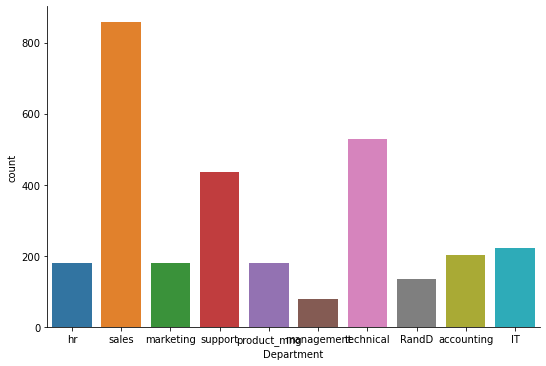

<Figure size 1080x1080 with 0 Axes>

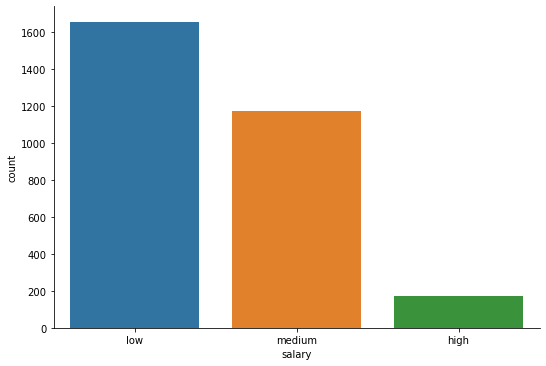

In [22]:
for i in cat_df:
    plt.figure(figsize=(15, 15))
    plot_factorplot(i) 

In [23]:
df.corr()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.358736,-0.712097,-0.840686,-0.704157,-0.521424,-0.086466,NaN
left,0.358736,1.000000,-0.197208,-0.341951,-0.223901,-0.345847,-0.203376,NaN
last_evaluation,-0.712097,-0.197208,1.000000,0.595306,0.625477,0.366338,0.030333,NaN
number_project,-0.840686,-0.341951,0.595306,1.000000,0.720856,0.444695,0.076084,NaN
average_montly_hours,-0.704157,-0.223901,0.625477,0.720856,1.000000,0.398381,0.049675,NaN
time_spend_company,-0.521424,-0.345847,0.366338,0.444695,0.398381,1.000000,0.083352,NaN
Work_accident,-0.086466,-0.203376,0.030333,0.076084,0.049675,0.083352,1.000000,NaN
promotion_last_5years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#cat_col = df.select_dtypes(exclude=np.number).columns
cat_col = df.select_dtypes(exclude=np.number)
cat_col

,Department,salary
0,hr,low
1,sales,medium
2,sales,medium
3,sales,medium
4,marketing,low
...,...,...
2995,sales,medium
2996,sales,medium
2997,IT,medium
2998,IT,medium


In [25]:
for i in cat_col:
    print(df[i].value_counts())

sales          859
technical      530
support        435
IT             222
accounting     202
hr             181
marketing      180
product_mng    179
RandD          134
management      78
Name: Department, dtype: int64
low       1657
medium    1173
high       170
Name: salary, dtype: int64


In [26]:
numerical_col = df.select_dtypes(include=np.number)
numerical_col

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.14,0,0.43,2,238,3,0,0
1,0.10,1,0.55,2,247,4,0,0
2,0.10,1,0.55,2,247,4,0,0
3,0.10,1,0.55,2,247,4,0,0
4,0.21,0,0.43,2,249,3,0,0
...,...,...,...,...,...,...,...,...
2995,0.31,0,0.63,4,104,7,1,0
2996,0.31,0,0.63,4,104,7,1,0
2997,0.47,0,0.46,2,152,2,0,0
2998,0.47,0,0.46,2,152,2,0,0


In [27]:
for i in numerical_col:
    print(i)

satisfaction_level
left
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
promotion_last_5years


In [28]:
df.columns.shape

(10,)

In [29]:
one_hot_categorical_variables = pd.get_dummies(cat_col)

In [30]:
one_hot_categorical_variables.head()

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1,0


In [31]:
df = pd.concat([numerical_col,one_hot_categorical_variables],sort=False,axis=1)
df.head()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.14,0,0.43,2,238,3,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0.10,1,0.55,2,247,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.10,1,0.55,2,247,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.10,1,0.55,2,247,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.21,0,0.43,2,249,3,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [32]:
x = df.drop(columns='left')

In [33]:
y = df['left']

In [34]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
model = GaussianNB()
model.fit(x_train, y_train)
train_Pred = model.predict(x_train)

In [35]:
metrics.confusion_matrix(y_train,train_Pred)

array([[522, 294],
       [330, 954]], dtype=int64)

In [36]:
metrics.accuracy_score(y_train,train_Pred)

0.7028571428571428

In [37]:
test_Pred = model.predict(x_test)

In [38]:
metrics.confusion_matrix(y_test,test_Pred)

array([[220, 125],
       [136, 419]], dtype=int64)

In [39]:
metrics.accuracy_score(y_test,test_Pred)

0.71

In [40]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, test_Pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, test_Pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, test_Pred))

Accuracy: 0.71
Precision: 0.7702205882352942
Recall: 0.7549549549549549


In [48]:
# print(df.iloc[99])
df[2555:2556]

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
2555,0.18,0,0.97,4,206,3,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [52]:
emp = [0.18,0.97,4,206,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0]
emp

[0.18, 0.97, 4, 206, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [53]:
emp = np.array([emp])
emp

array([[1.80e-01, 9.70e-01, 4.00e+00, 2.06e+02, 3.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00]])

In [54]:

model.predict(emp)

array([0], dtype=int64)

In [55]:
pred = model.predict(emp)

if pred[0] == 0:
    print("not left")
else:
    print("left)")

not left
